<a href="https://colab.research.google.com/github/MABasiri/Students-Performance/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = 8,4
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/data analytic/project/n.csv")
df.head(10)

In [ ]:
df = pd.read_csv("/content/drive/My Drive/data analytic/project/StudentsPerformance.csv",index_col='gender')
dfff = pd.read_csv("/content/drive/My Drive/data analytic/project/StudentsPerformance.csv")
df.head(10)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78
female,group B,some college,standard,completed,88,95,92
male,group B,some college,free/reduced,none,40,43,39
male,group D,high school,free/reduced,completed,64,64,67


In [ ]:
writing=dfff[['gender','writing score']]
display(writing)

,gender,writing score
0,female,74
1,female,88
2,female,93
3,male,44
4,male,75
...,...,...
995,female,95
996,male,55
997,female,65
998,female,77


TypeError: ignored

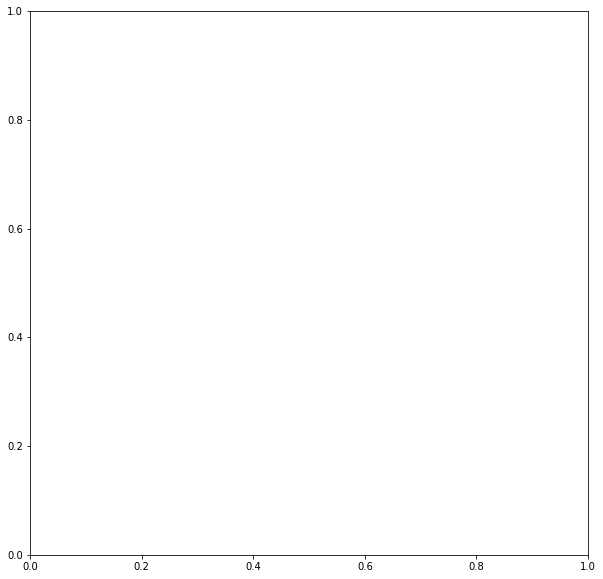

In [ ]:
plt.figure(figsize=(10,10))
for gender in df.index:
  plt.plot(dfff[['gender','writing score']], dfff[['gender','writing score']])

In [ ]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


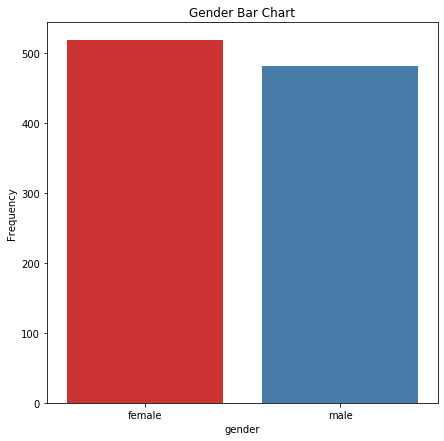

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x=df["gender"], palette="Set1")
plt.ylabel('Frequency')
plt.title('Gender Bar Chart')
plt.savefig("/content/drive/My Drive/data analytic/project/gender.svg" , format='svg', dpi=1200)

plt.show()

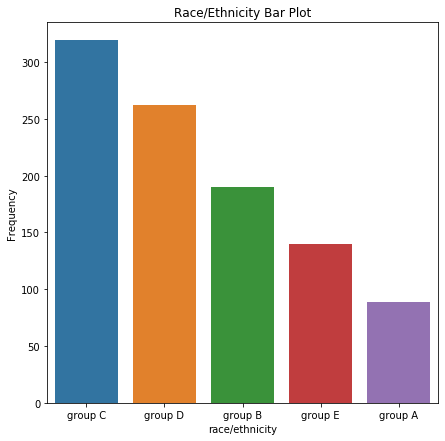

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['race/ethnicity'].value_counts().index,
              y=df['race/ethnicity'].value_counts().values)
plt.xlabel('race/ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Bar Plot')
plt.savefig("/content/drive/My Drive/data analytic/project/race.svg" , format='svg', dpi=1200)
plt.show()

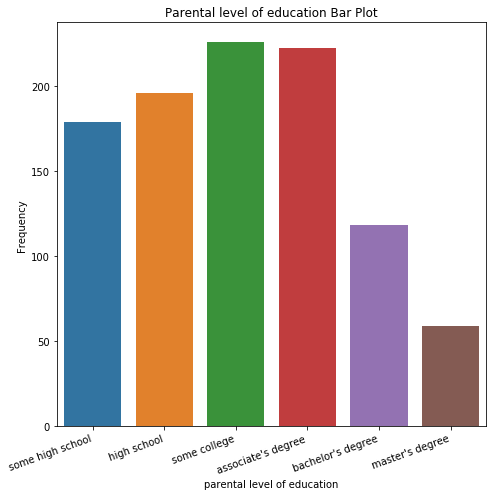

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='parental level of education', data=df, order=['some high school', 'high school','some college', 'associate\'s degree', 
                                                                         "bachelor's degree","master's degree"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.title('Parental level of education Bar Plot')
plt.ylabel('Frequency')
plt.savefig("/content/drive/My Drive/data analytic/project/parent.svg" , format='svg', dpi=1200)
plt.tight_layout()

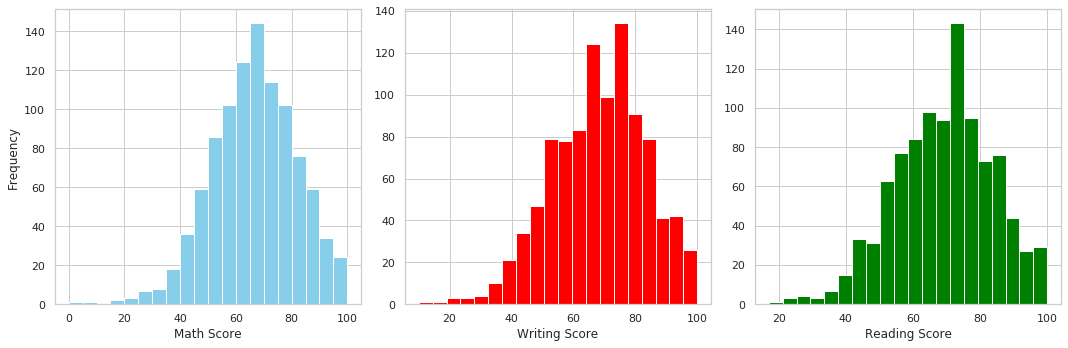

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(df["math score"], bins=20,  color = "skyblue")
axes[0].set_xlabel("Math Score")
axes[0].set_ylabel("Frequency")
axes[1].hist(df["writing score"], bins=20,  color = "red")
axes[1].set_xlabel("Writing Score")
axes[2].hist(df["reading score"], bins=20,  color = "green")
axes[2].set_xlabel("Reading Score")
plt.savefig("/content/drive/My Drive/data analytic/project/exam hist.svg" , format='svg', dpi=1200)
fig.tight_layout()

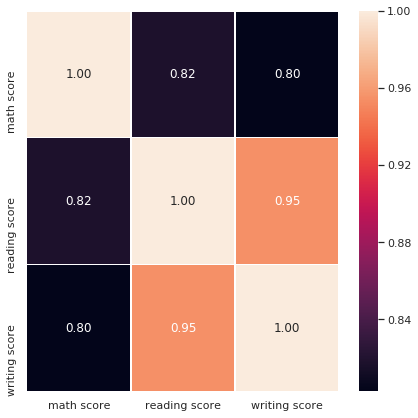

In [ ]:

df["total"] = df["math score"] +df["reading score"]+df["writing score"]
dfc= df.drop(columns= "total")
dfc.corr()
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig("/content/drive/My Drive/data analytic/project/exam cor.svg" , format='svg', dpi=1200)
plt.show()


In [ ]:
pl = df.groupby("gender")
pl=pl.mean()
cm = sns.light_palette("green", as_cmap=True)
s= pl.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
gender,,,,
female,63.6332,72.6081,72.4672,208.708
male,68.7282,65.473,63.3112,197.512


<Figure size 576x504 with 0 Axes>

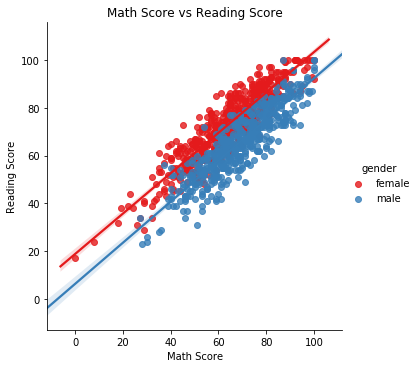

In [ ]:
plt.figure(figsize=(8,7))
sns.lmplot(x='math score',y='reading score',hue='gender',data=df, palette="Set1")
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score')
plt.savefig("/content/drive/My Drive/data analytic/project/reg.svg" , format='svg', dpi=1200)
plt.show()

In [ ]:
pl = df.groupby("parental level of education")
meanscore_byEducation =pl.mean()
medianscore_byEducation=pl.median()
cm = sns.light_palette("green", as_cmap=True)
s= meanscore_byEducation.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.8829,70.9279,69.8964
bachelor's degree,69.3898,73,73.3814
high school,62.1378,64.7041,62.449
master's degree,69.7458,75.3729,75.678
some college,67.1283,69.4602,68.8407
some high school,63.4972,66.9385,64.8883


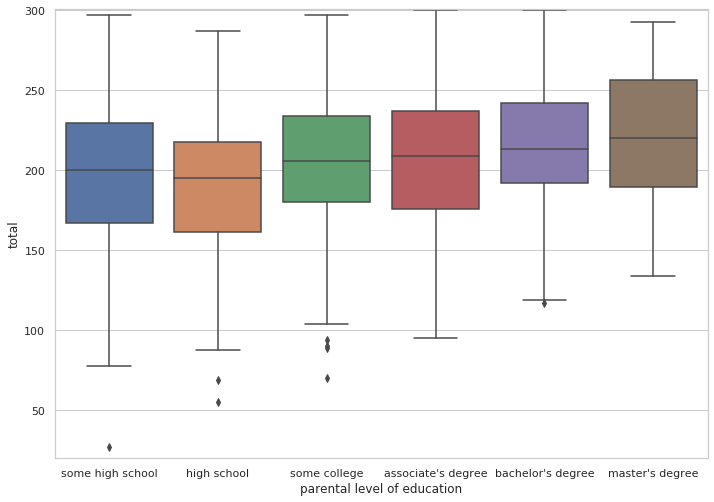

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="parental level of education", y="total", data=df, order=['some high school', 'high school','some college', 'associate\'s degree', 
                                                                         "bachelor's degree","master's degree"])
plt.gcf().set_size_inches(11.7, 8.27)
#ax = sns.swarmplot(x="parental level of education", y="total", data=df, color=".25")
plt.ylim((20,301))
plt.gcf().set_size_inches(11.7, 8.27)
plt.savefig("/content/drive/My Drive/data analytic/project/box.svg" , format='svg', dpi=1200)
plt.show()

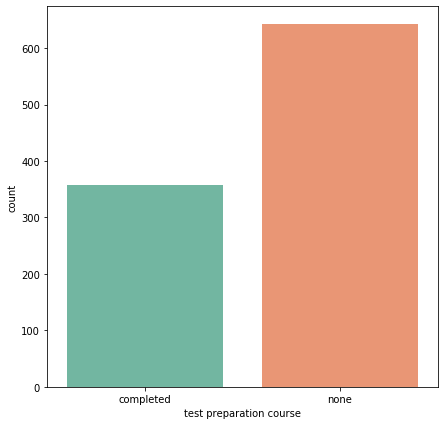

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x=df["test preparation course"], order=df["test preparation course"].value_counts(ascending = True).index, palette="Set2")
plt.savefig("/content/drive/My Drive/data analytic/project/test.svg" , format='svg', dpi=1200)

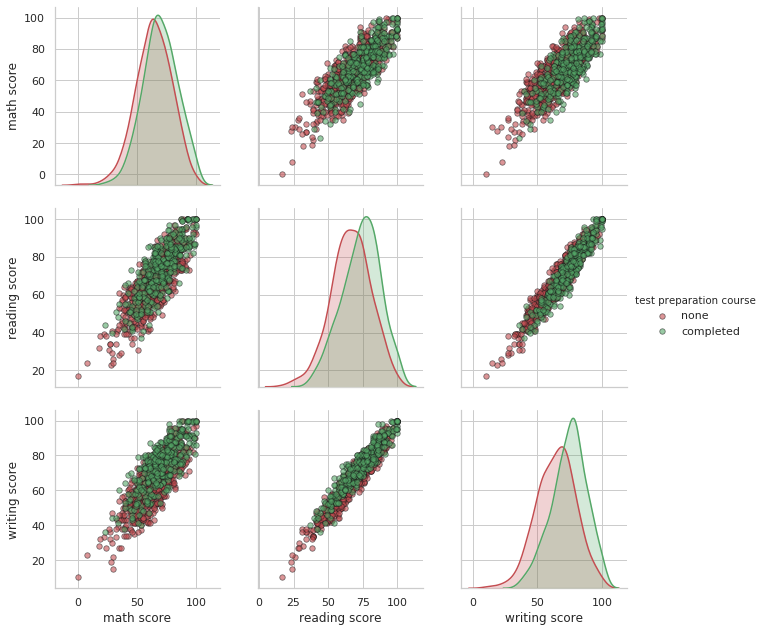

In [ ]:
palette ={"completed":"C2","none":"C3"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="test preparation course", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},size=3)
plt.savefig("/content/drive/My Drive/data analytic/project/scat.svg" , format='svg', dpi=1200)

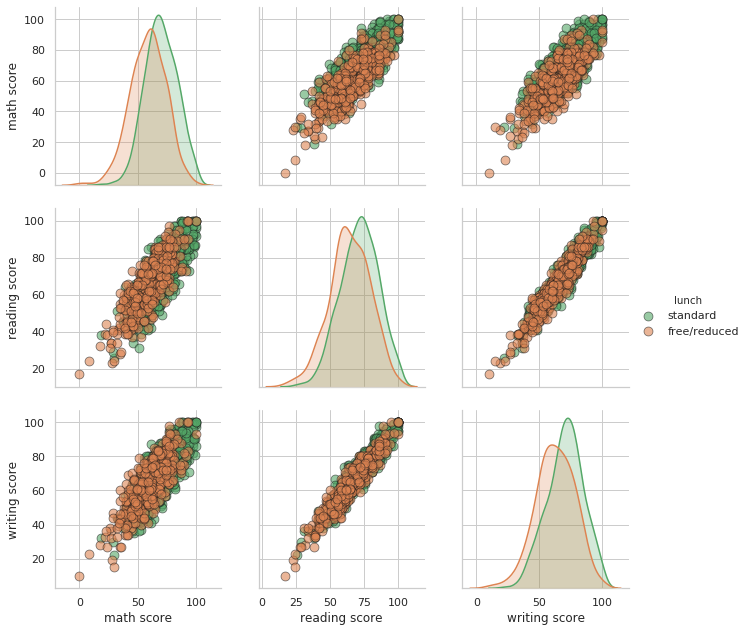

In [ ]:
palette ={"standard":"C2","free/reduced":"C1"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="lunch", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['race/ethnicity'].value_counts().index,
              y=df['race/ethnicity'].value_counts().values, color="lunch", barmode= 'group')
plt.xlabel('race/ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Bar Plot')
plt.savefig("/content/drive/My Drive/data analytic/project/barracevlunch.svg" , format='svg', dpi=1200)
plt.show()

ValueError: ignored

<Figure size 504x504 with 0 Axes>

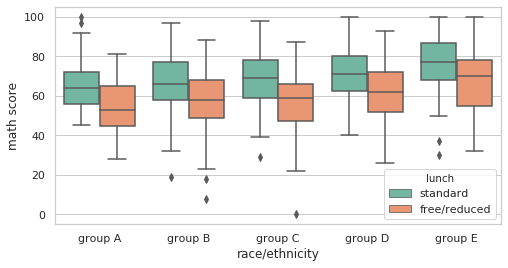

In [ ]:
sns.boxplot(x=df['race/ethnicity'],y=df['math score'],hue=df['lunch'], palette="Set2", order=['group A', 'group B','group C', 'group D', 'group E'])
#ax = sns.swarmplot(x='race/ethnicity', y="math score", data=df, color=".25")
plt.savefig("/content/drive/My Drive/data analytic/project/boxplot lunch.svg" , format='svg', dpi=1200)
plt.show()

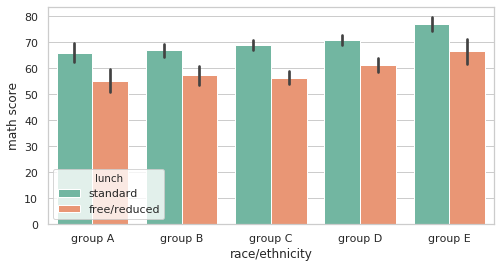

In [ ]:
sns.barplot(x=df['race/ethnicity'],y=df['math score'],hue=df['lunch'], palette="Set2", order=['group A', 'group B','group C', 'group D', 'group E'])
#ax = sns.swarmplot(x='race/ethnicity', y="math score", data=df, color=".25")
plt.show()



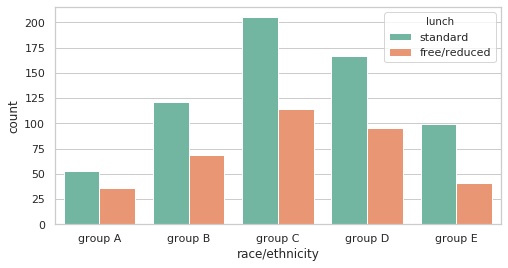

In [ ]:
sns.countplot(x=df['race/ethnicity'],hue=df['lunch'], palette="Set2", order=['group A', 'group B','group C', 'group D', 'group E'])
#ax = sns.swarmplot(x='race/ethnicity', y="math score", data=df, color=".25")
plt.savefig("/content/drive/My Drive/data analytic/project/barchartlunch.svg" , format='svg', dpi=1200)
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/My Drive/data analytic/project/StudentsPerformance.csv")
passmarks = 40
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Pass,Pass,Pass
996,male,group C,high school,free/reduced,none,62,55,55,Pass,Pass,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,Pass,Pass,Pass
998,female,group D,some college,standard,completed,68,78,77,Pass,Pass,Pass


In [ ]:
df['condition'] = df.apply(lambda x : 'Critical' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'Great', axis = 1)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,condition
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,Great
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,Great
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,Great
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,Great
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,Great
5,female,group B,associate's degree,standard,none,71,83,78,Pass,Pass,Pass,Great
6,female,group B,some college,standard,completed,88,95,92,Pass,Pass,Pass,Great
7,male,group B,some college,free/reduced,none,40,43,39,Pass,Pass,Fail,Critical
8,male,group D,high school,free/reduced,completed,64,64,67,Pass,Pass,Pass,Great
9,female,group B,high school,free/reduced,none,38,60,50,Fail,Pass,Pass,Critical


count      1000
unique        2
top       Great
freq        949
Name: condition, dtype: object


<function matplotlib.pyplot.show>

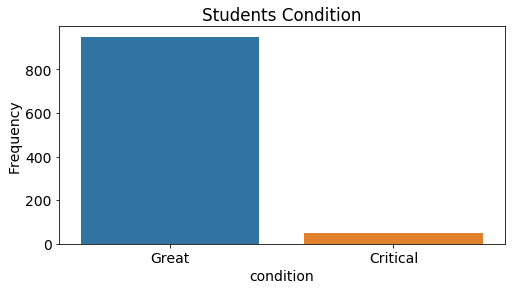

In [ ]:
sns.countplot(x = "condition", data = df)
print(df["condition"].describe())
plt.ylabel('Frequency')
plt.title('Students Condition')
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/cr.svg" , format='svg', dpi=1200)
plt.show

In [ ]:
df.drop(['math score','reading score','writing score'],axis =1 ,inplace = True)

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,pass_math,pass_reading,pass_writing,condition
0,female,group B,bachelor's degree,standard,none,Pass,Pass,Pass,Great
1,female,group C,some college,standard,completed,Pass,Pass,Pass,Great
2,female,group B,master's degree,standard,none,Pass,Pass,Pass,Great
3,male,group A,associate's degree,free/reduced,none,Pass,Pass,Pass,Great
4,male,group C,some college,standard,none,Pass,Pass,Pass,Great
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,Pass,Pass,Pass,Great
996,male,group C,high school,free/reduced,none,Pass,Pass,Pass,Great
997,female,group C,high school,free/reduced,completed,Pass,Pass,Pass,Great
998,female,group D,some college,standard,completed,Pass,Pass,Pass,Great


In [ ]:
df.drop(['pass_math','pass_reading','pass_writing'],axis =1 ,inplace = True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,condition
0,female,group B,bachelor's degree,standard,none,Great
1,female,group C,some college,standard,completed,Great
2,female,group B,master's degree,standard,none,Great
3,male,group A,associate's degree,free/reduced,none,Great
4,male,group C,some college,standard,none,Great
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,Great
996,male,group C,high school,free/reduced,none,Great
997,female,group C,high school,free/reduced,completed,Great
998,female,group D,some college,standard,completed,Great


In [ ]:
X = df

In [ ]:
from sklearn.preprocessing import LabelEncoder

X["gender"]=LabelEncoder().fit_transform(X["gender"])
#X["race/ethnicity"]=LabelEncoder().fit_transform(X["race/ethnicity"])
#X["parental level of education"]=LabelEncoder().fit_transform(X["parental level of education"])
X["condition"]=LabelEncoder().fit_transform(X["condition"])
X["lunch"]=LabelEncoder().fit_transform(X["lunch"])
#X["test preparation course"]=LabelEncoder().fit_transform(X["test preparation course"])
X["test preparation course"] = X["test preparation course"].map({'none': 0, 'completed': 1})

#d = pd.get_dummies(X["race/ethnicity"])

In [ ]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,condition
0,0,group B,bachelor's degree,1,0,1
1,0,group C,some college,1,1,1
2,0,group B,master's degree,1,0,1
3,1,group A,associate's degree,0,0,1
4,1,group C,some college,1,0,1
...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,1
996,1,group C,high school,0,0,1
997,0,group C,high school,0,1,1
998,0,group D,some college,1,1,1


In [ ]:
def is_categorical(array_like):
    return array_like.dtype.name == 'object'

catFilter = [is_categorical(X.iloc[:,i])  for i in range(0, len(X.columns))] 
categoricalCols = X.columns[catFilter].tolist()
print(categoricalCols) 

['race/ethnicity', 'parental level of education']


In [ ]:
X.iloc[:,1]

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

In [ ]:
cat_vars= categoricalCols
for var in cat_vars:
    cat_list = "var"+" _ " +var
    cat_list = pd.get_dummies(X[var],drop_first=True, prefix=var)
    df1= X.join(cat_list)
    X= df1
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,condition,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,group B,bachelor's degree,1,0,1,1,0,0,0,1,0,0,0,0
1,0,group C,some college,1,1,1,0,1,0,0,0,0,0,1,0
2,0,group B,master's degree,1,0,1,1,0,0,0,0,0,1,0,0
3,1,group A,associate's degree,0,0,1,0,0,0,0,0,0,0,0,0
4,1,group C,some college,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,1,0,0,0,1,0,0,1,0,0
996,1,group C,high school,0,0,1,0,1,0,0,0,1,0,0,0
997,0,group C,high school,0,1,1,0,1,0,0,0,1,0,0,0
998,0,group D,some college,1,1,1,0,0,1,0,0,0,0,1,0


In [ ]:
#Remove original categorical columns
cat_vars= categoricalCols
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
finalDf = X[to_keep]
finalDf

,gender,lunch,test preparation course,condition,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,1,1,0,0,0,1,0,0,0,0
1,0,1,1,1,0,1,0,0,0,0,0,1,0
2,0,1,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,1,0,0,0,1,0,0,1,0,0
996,1,0,0,1,0,1,0,0,0,1,0,0,0
997,0,0,1,1,0,1,0,0,0,1,0,0,0
998,0,1,1,1,0,0,1,0,0,0,0,1,0


In [ ]:
x_ = finalDf.loc[: , finalDf.columns != "condition"]
y_ = finalDf.loc[: , finalDf.columns == "condition"]

In [ ]:
y_

,condition
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [ ]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=0)
print(X_train.shape)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train) #create oversampling on traning data only
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['condition'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Critical condition",len(os_data_y[os_data_y['condition']==0]))
print("Number of Great condition",len(os_data_y[os_data_y['condition']==1]))
print("Proportion of Critical condition in oversampled data is ",len(os_data_y[os_data_y['condition']==0])/len(os_data_X))
print("Proportion of Great condition data in oversampled data is ",len(os_data_y[os_data_y['condition']==1])/len(os_data_X))

(800, 12)
length of oversampled data is  1522
Number of Critical condition 761
Number of Great condition 761
Proportion of Critical condition in oversampled data is  0.5
Proportion of Great condition data in oversampled data is  0.5


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2'] }
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2,random_state = 1)
logreg = GridSearchCV(LogisticRegression(),param_grid , cv=5)
#logreg.fit(X_train, y_train)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.5f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))
y_pred_prob_logreg = logreg.predict_proba(X_test)

Accuracy of logistic regression classifier on train set: 0.89400
Accuracy of logistic regression classifier on test set: 0.88525


{'C': 10, 'penalty': 'l1'}
best score 0.8923582580115037
[0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0]
***Logistic Regression***
Accuracy Score: 0.89
Accuracy of logistic regression classifier on train set: 0.89400
Accuracy of logistic regression classifier on test set: 0.88525
Confusion Matrix:
[[135  17]
 [ 18 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88     

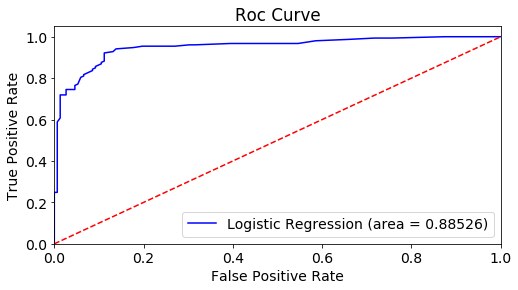

In [ ]:
param_grid = { 'C': [1, 10, 100, 1000],'penalty': ['l1', 'l2'] }

logreg = LogisticRegression()   # create model that is empty yet
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2,random_state = 1)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)     # cross validation. with "cv=5" parameter, specified to how many iteration step applied
logreg_cv.fit(X_train, y_train)

# now, the best value of above mentioned 'C' and 'penalty' variables will be choosen.
print(logreg_cv.best_params_)
print("best score", logreg_cv.best_score_) # best score: r**2 (1: the best, 0: the worst)


# Logistic Regression Model Fitting and Performance Metrics
logreg = LogisticRegression(C=logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'])

# to fit
logreg.fit(X_train, y_train)

# predict to y
y_pred = logreg.predict(X_test)
print(y_pred)


# calculate to 'accuracy'  
logreg_acc_score = round(logreg.score(X_train, y_train), 2)
print("***Logistic Regression***")
print("Accuracy Score:", logreg_acc_score)
print('Accuracy of logistic regression classifier on train set: {:.5f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))
logreg_acc_score = round(logreg.score(X_train, y_train) * 100, 4)
logreg_acc_scoret = round(logreg.score(X_test, y_test) * 100, 4)

# print to 'confusion matrix'
# TP, FN
# FP, TN
print("Confusion Matrix:")
cm_log=confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))


# print to 'precision','recall', 'support', and 'f1' scores
print("Classification Report:")
print(classification_report(y_test, y_pred))


# calculate to probability and add to 'test_score' dataframe that created new
y_pred_prob_logreg = logreg.predict_proba(X_test)

pred_prob = pd.DataFrame(data=y_pred_prob_logreg, columns=["prob0_logreg","prob1_logreg"])
test_score_x = pd.DataFrame(data=X_test)
test_score_y = pd.DataFrame(data=y_test, columns=['Churn'])
test_score = pd.concat([test_score_x, test_score_y], axis=1)
test_score = pd.concat([test_score['Churn'], pred_prob["prob1_logreg"]], axis=1)



# calculate to 'roc score'
print("ROC_AUC Score:")
roc_score_logistic = roc_auc_score(y_test, y_pred)
print(roc_score_logistic)


print(logreg.coef_)                # Coefficient of the features in the decision function.
print(logreg.intercept_)           # intercept (a.k.a. bias) added to the decision function.

# Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. 
# For liblinear solver, only the maximum number of iteration across all classes is given.
print(logreg.n_iter_)              

#print("MSE(mean squared error):", np.mean((y_pred-y_test)**2)) # mean squared error, MSE
#print("RMSE(root mean squared error):", np.sqrt(np.mean((y_pred-y_test)**2))) # root mean squared error, RMSE


# print to roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg[:, 1])
plt.figure()
plt.plot(fpr, tpr,color="b", label='Logistic Regression (area = %0.5f)' % roc_score_logistic)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/Roc_Log.svg" , format='svg', dpi=1200)
plt.show()

In [ ]:
os_data_y

,condition
0,1
1,1
2,1
3,1
4,1
...,...
1517,0
1518,0
1519,0
1520,0


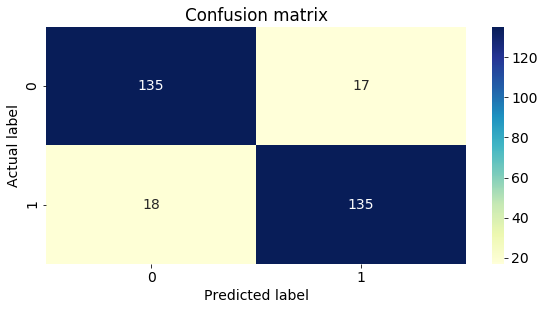

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/Con_Log.svg" , format='svg', dpi=1200)
plt.show()

In [ ]:
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LogisticRegression(), X = os_data_X, y = os_data_y, cv = 6, scoring="accuracy")
print("accuracies",accuracies)
print("Mean of the accuracies is",accuracies.mean() )
print("Sd of the accuracies is",accuracies.std() )

accuracies [0.83464567 0.9015748  0.94094488 0.88976378 0.86614173 0.8968254 ]
Mean of the accuracies is 0.8883160438278549
Sd of the accuracies is 0.03264021935421941


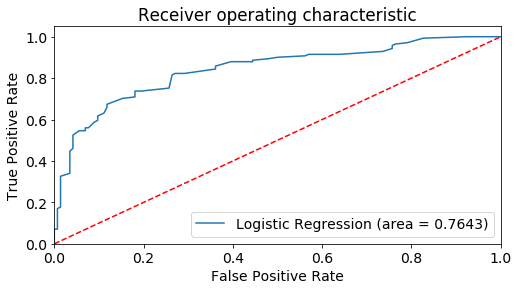

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
roc_score_logistic = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.rcParams.update({'font.size': 14})
plt.show()

{'n_neighbors': 5}
best score 0.8866064092029581
Accuracy Score: 89.98
Accuracy of logistic K Neighbors Classifier on test set: 0.89975
Accuracy of logistic K Neighbors Classifier on test set: 0.89180
Confusion Matrix:
[[145   7]
 [ 26 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       152
           1       0.95      0.83      0.89       153

    accuracy                           0.89       305
   macro avg       0.90      0.89      0.89       305
weighted avg       0.90      0.89      0.89       305

ROC_AUC Score: 0.8920063639490885


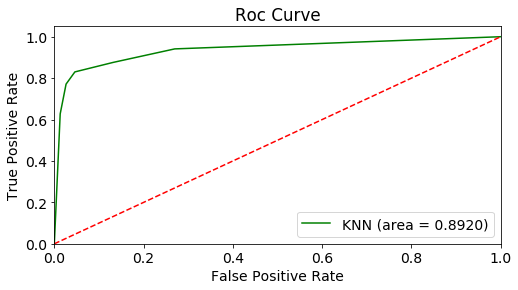

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier() # create model that is empty yet
knn_cv = GridSearchCV(knn, param_grid, cv=5) # cross validation
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print("best score", knn_cv.best_score_)

# KNN Model Fitting and Performance Metrics
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# calculate to accuracy score
knn_acc_score = round(knn.score(X_train, y_train) * 100, 2)
print("Accuracy Score:", knn_acc_score)
print('Accuracy of logistic K Neighbors Classifier on test set: {:.5f}'.format(knn.score(X_train, y_train)))
print('Accuracy of logistic K Neighbors Classifier on test set: {:.5f}'.format(knn.score(X_test, y_test)))
knn_acc_score = round(knn.score(X_train, y_train) * 100, 4)
knn_acc_scoret = round(knn.score(X_test, y_test) * 100, 4)

# print to confusion matrix and classification report
print("Confusion Matrix:")
cm_knn=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# calculate to probability and add to 'test_score' dataframe that created before (in logistic regression part)
y_pred_prob_knn =knn.predict_proba(X_test)
pred_prob = pd.DataFrame(data=y_pred_prob_knn, columns=["prob0_knn","prob1_knn"])
test_score_x = pd.DataFrame(data=X_test)
test_score_y = pd.DataFrame(data=y_test, columns=['condition'])
test_score = pd.concat([test_score_x, test_score_y], axis=1)
test_score = pd.concat([test_score, pred_prob["prob1_knn"]], axis=1)

# calculate to roc score
roc_score_knn = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_knn)

# print to roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn[:, 1])
plt.figure()
plt.plot(fpr, tpr, color="green",label='KNN (area = %0.4f)' % roc_score_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/Roc_KNN.svg" , format='svg', dpi=1200)
plt.show()

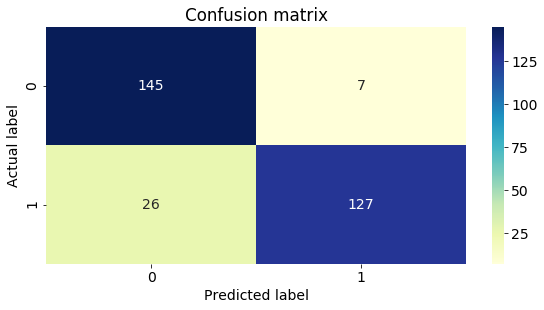

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/Con_KNN.svg" , format='svg', dpi=1200)
plt.show()

{'C': 1000, 'gamma': 0.001}
best score 0.8898931799506984
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 0 1 1 0]
Accuracy Score: 88.99
Accuracy of SVM on train set: 0.88989
Accuracy of SVM on test set: 0.86885
Confusion Matrix:
[[126  26]
 [ 14 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       152
           1       0.84      0.91      0.87       15

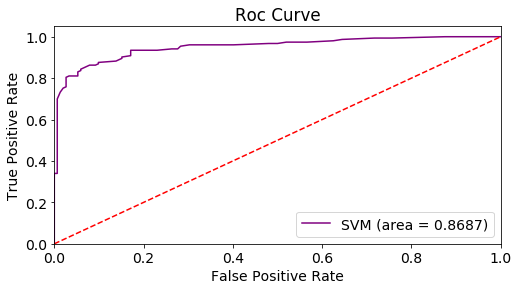

In [ ]:
from sklearn.svm import SVC
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1e-3, 1e-4] }
svm = SVC()  # create model that is empty yet
svm_cv = GridSearchCV(svm, param_grid, cv=5)  # cross validation. with "cv=5" parameter, specified to how many iteration step applied
svm_cv.fit(X_train, y_train)

# now, the best value of above mentioned 'C' and 'gamma' variables will be choosen.
print(svm_cv.best_params_)
print("best score", svm_cv.best_score_)

# SVM Model Fitting and Performance Metrics
svm = SVC(C=svm_cv.best_params_['C'], gamma=svm_cv.best_params_['gamma'], probability=True)
a=svm.fit(X_train, y_train)

# predict to y
y_pred = svm.predict(X_test)
print(y_pred)

# calculate to accuracy
svm_acc_score = round(svm.score(X_train, y_train) * 100, 2)
print("Accuracy Score:", svm_acc_score)
print('Accuracy of SVM on train set: {:.5f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.5f}'.format(svm.score(X_test, y_test)))
svm_acc_score = round(svm.score(X_train, y_train) * 100, 4)
svm_acc_scoret = round(svm.score(X_test, y_test) * 100, 4)

# print to confusion matrix
print("Confusion Matrix:")
cm_svm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# print to classification report so calculate to 'precision','recall', 'support', and 'f1' scores
print("Classification Report:")
print(classification_report(y_test, y_pred))

# calculate to probability and add to 'test_score' dataframe that created before (in logistic regression part)
y_pred_prob_svm = svm.predict_proba(X_test)
pred_prob = pd.DataFrame(data=y_pred_prob_svm, columns=["prob0_svm","prob1_svm"])
test_score_x = pd.DataFrame(data=X_test)
test_score_y = pd.DataFrame(data=y_test, columns=['condition'])
test_score = pd.concat([test_score_x, test_score_y], axis=1)
test_score = pd.concat([test_score, pred_prob["prob1_svm"]], axis=1)

# print to roc score
roc_score_svm = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_svm)

print(svm.support_vectors_)
print(svm.n_support_) #Number of support vectors for each class.
print(svm.intercept_) #Constants in decision function.
print(svm.fit_status_) # 0 if correctly fitted, 1 otherwise (will raise warning)
#print(np.mean((y_pred-y_test)**2))

# print to roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm[:, 1])
plt.figure()
plt.plot(fpr, tpr,color="purple", label='SVM (area = %0.4f)' % roc_score_svm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/ROC_SVM.svg" , format='svg', dpi=1200)
plt.show()


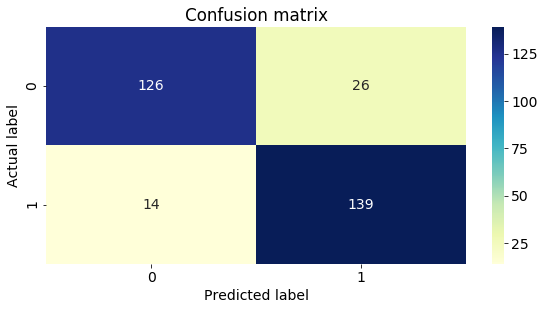

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/Con_SVM.svg" , format='svg', dpi=1200)
plt.show()

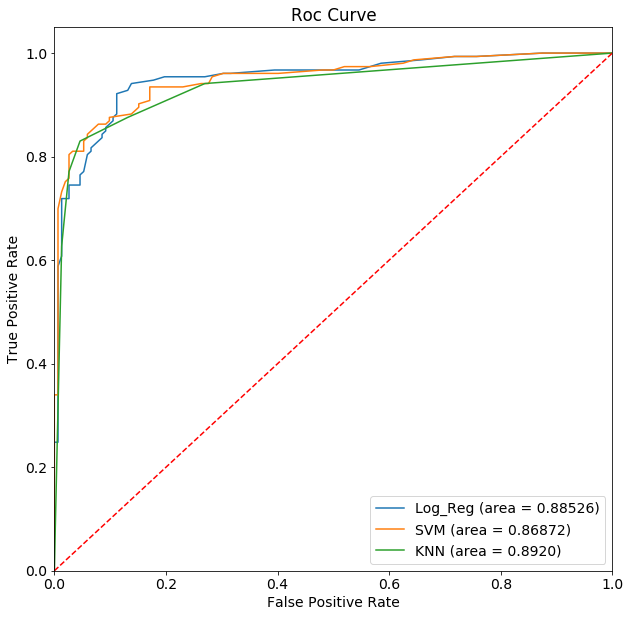

In [ ]:
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_prob_logreg[:, 1])
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_prob_svm[:, 1])
# fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, y_pred_prob_dtree[:, 1])
# fpr_rforest, tpr_rforest, thresholds = roc_curve(y_test, y_pred_prob_rforest[:, 1])
#fpr_GaussianNB, tpr_GaussianNB, thresholds = roc_curve(y_test, y_pred_prob_GaussianNB[:, 1])
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob_knn[:, 1])
# fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_pred_prob_mlp[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr_logreg, tpr_logreg, label='Log_Reg (area = %0.5f)' % roc_score_logistic)
# plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % roc_score_mlp)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.5f)' % roc_score_svm)
# plt.plot(fpr_dtree, tpr_dtree, label='Decision_Tree (area = %0.2f)' % roc_score_decision_tree)
# plt.plot(fpr_rforest, tpr_rforest, label='Random_Forest (area = %0.2f)' % roc_score_rforest)
#plt.plot(fpr_GaussianNB, tpr_GaussianNB, label='GaussianNB (area = %0.2f)' % roc_score_GaussianNB)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.4f)' % roc_score_knn)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.rcParams.update({'font.size': 14})
plt.savefig("/content/drive/My Drive/data analytic/project/ROC_ALL.svg" , format='svg', dpi=1200)
plt.show()

In [ ]:
models_all = pd.DataFrame(
    data=["Logistic regression", "SVM",  "KNN"], 
    columns=["Algorithms"])

accuracy_all = pd.DataFrame(
    data=[logreg_acc_score, svm_acc_score, knn_acc_score],
    columns=["Train Accuracy(%)"])

accuracy_allt = pd.DataFrame(
    data=[logreg_acc_scoret, svm_acc_scoret, knn_acc_scoret],
    columns=["Test Accuracy(%)"])

roc_all = pd.DataFrame(
    data=[roc_score_logistic, roc_score_svm, roc_score_knn], 
    columns=["AUC value"])

comparison_models = pd.concat([models_all, accuracy_all,accuracy_allt, roc_all], axis=1)
comparison_models = comparison_models.sort_values(by=["AUC value"], ascending=False)
comparison_models

,Algorithms,Train Accuracy(%),Test Accuracy(%),AUC value
2,KNN,89.9753,89.1803,0.892006
0,Logistic regression,89.4002,88.5246,0.885255
1,SVM,88.9893,86.8852,0.868722


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s= comparison_models.style.background_gradient(cmap=cm)
s

,Algorithms,Train Accuracy(%),Test Accuracy(%),AUC value
2,KNN,89.9753,89.1803,0.892006
0,Logistic regression,89.4002,88.5246,0.885255
1,SVM,88.9893,86.8852,0.868722
